```
Train Data of Housing Price Prediction
1460 x 81<-- Train Data
38 Numeric Variables <-- Including SalePrice Response Variable
43 Categorical Variables
out of 38 Numberical Variables-> In Train Set,3 columns  have missing data of about 17%, 5% and 0.05%.
In this Kernel, Dropped the 3 Numerical Columns with Mising Data from Train data 
In test Data , fillna is used for handling missing numerical values.
```

In [121]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [122]:
train_data = pd.read_csv("train.csv")

In [123]:
test_data = pd.read_csv("test.csv")

In [124]:
train_data.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities    ...     PoolArea PoolQC Fence MiscFeature MiscVal  \
0         Lvl    AllPub    ...            0    NaN   NaN         NaN       0   
1         Lvl    AllPub    ...            0    NaN   NaN         NaN       0   
2         Lvl    AllPub    ...            0    NaN   NaN         NaN       0   
3         Lvl    AllPub    ...            0    NaN   NaN         NaN       0   
4         Lvl    AllPub    ...            0    NaN   NaN         NaN       0   

  MoSold YrSold  SaleType  SaleCondition  SalePrice  
0      2   2008        WD         Normal     208500  
1      5   2007        WD         Normal     181500  
2      9   2008        WD         Normal     223500  
3      2   2006        WD        Abnorml     140000  
4     12   2008        WD         Normal     250000  

[5 rows x 81 columns]

In [125]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

In [126]:
train_data.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [127]:
train_data.select_dtypes(include='object').columns #43 Columns

Index(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature',
       'SaleType', 'SaleCondition'],
      dtype='object')

In [128]:
train_data.select_dtypes(exclude='object').columns #38 Columns Numeric

Index(['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
       'MiscVal', 'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')

In [129]:
test_data.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0  1461          20       RH         80.0    11622   Pave   NaN      Reg   
1  1462          20       RL         81.0    14267   Pave   NaN      IR1   
2  1463          60       RL         74.0    13830   Pave   NaN      IR1   
3  1464          60       RL         78.0     9978   Pave   NaN      IR1   
4  1465         120       RL         43.0     5005   Pave   NaN      IR1   

  LandContour Utilities      ...       ScreenPorch PoolArea PoolQC  Fence  \
0         Lvl    AllPub      ...               120        0    NaN  MnPrv   
1         Lvl    AllPub      ...                 0        0    NaN    NaN   
2         Lvl    AllPub      ...                 0        0    NaN  MnPrv   
3         Lvl    AllPub      ...                 0        0    NaN    NaN   
4         HLS    AllPub      ...               144        0    NaN    NaN   

  MiscFeature MiscVal MoSold  YrSold  SaleType  SaleCondition  
0         NaN       0      6    2010        WD         Normal  
1        Gar2   12500      6    2010        WD         Normal  
2         NaN       0      3    2010        WD         Normal  
3         NaN       0      6    2010        WD         Normal  
4         NaN       0      1    2010        WD         Normal  

[5 rows x 80 columns]

In [130]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 80 columns):
Id               1459 non-null int64
MSSubClass       1459 non-null int64
MSZoning         1455 non-null object
LotFrontage      1232 non-null float64
LotArea          1459 non-null int64
Street           1459 non-null object
Alley            107 non-null object
LotShape         1459 non-null object
LandContour      1459 non-null object
Utilities        1457 non-null object
LotConfig        1459 non-null object
LandSlope        1459 non-null object
Neighborhood     1459 non-null object
Condition1       1459 non-null object
Condition2       1459 non-null object
BldgType         1459 non-null object
HouseStyle       1459 non-null object
OverallQual      1459 non-null int64
OverallCond      1459 non-null int64
YearBuilt        1459 non-null int64
YearRemodAdd     1459 non-null int64
RoofStyle        1459 non-null object
RoofMatl         1459 non-null object
Exterior1st      1458 non-

#Missing Values

In [131]:
((train_data.isnull().sum()/1460)*100).sort_values(ascending=False)

PoolQC           99.520548
MiscFeature      96.301370
Alley            93.767123
Fence            80.753425
FireplaceQu      47.260274
LotFrontage      17.739726
GarageCond        5.547945
GarageType        5.547945
GarageYrBlt       5.547945
GarageFinish      5.547945
GarageQual        5.547945
BsmtExposure      2.602740
BsmtFinType2      2.602740
BsmtFinType1      2.534247
BsmtCond          2.534247
BsmtQual          2.534247
MasVnrArea        0.547945
MasVnrType        0.547945
Electrical        0.068493
Utilities         0.000000
YearRemodAdd      0.000000
MSSubClass        0.000000
Foundation        0.000000
ExterCond         0.000000
ExterQual         0.000000
Exterior2nd       0.000000
Exterior1st       0.000000
RoofMatl          0.000000
RoofStyle         0.000000
YearBuilt         0.000000
                   ...    
GarageArea        0.000000
PavedDrive        0.000000
WoodDeckSF        0.000000
OpenPorchSF       0.000000
3SsnPorch         0.000000
BsmtUnfSF         0.000000
S

In [132]:
train_data.select_dtypes(exclude='object').isnull().sum().sort_values(ascending=False)
#Train data Numerical Missing Values

LotFrontage      259
GarageYrBlt       81
MasVnrArea         8
BsmtFinSF1         0
LowQualFinSF       0
2ndFlrSF           0
1stFlrSF           0
TotalBsmtSF        0
BsmtUnfSF          0
BsmtFinSF2         0
SalePrice          0
BsmtFullBath       0
YearRemodAdd       0
YearBuilt          0
OverallCond        0
OverallQual        0
LotArea            0
MSSubClass         0
GrLivArea          0
BsmtHalfBath       0
YrSold             0
FullBath           0
MoSold             0
MiscVal            0
PoolArea           0
ScreenPorch        0
3SsnPorch          0
EnclosedPorch      0
OpenPorchSF        0
WoodDeckSF         0
GarageArea         0
GarageCars         0
Fireplaces         0
TotRmsAbvGrd       0
KitchenAbvGr       0
BedroomAbvGr       0
HalfBath           0
Id                 0
dtype: int64

In [133]:
test_data.select_dtypes(exclude='object').isnull().sum().sort_values(ascending=False)
#Test Data Numerocal Missing Values

LotFrontage      227
GarageYrBlt       78
MasVnrArea        15
BsmtHalfBath       2
BsmtFullBath       2
GarageArea         1
BsmtFinSF1         1
BsmtFinSF2         1
BsmtUnfSF          1
TotalBsmtSF        1
GarageCars         1
OverallQual        0
OverallCond        0
YearBuilt          0
YearRemodAdd       0
LowQualFinSF       0
LotArea            0
MSSubClass         0
1stFlrSF           0
2ndFlrSF           0
YrSold             0
GrLivArea          0
MoSold             0
FullBath           0
HalfBath           0
BedroomAbvGr       0
KitchenAbvGr       0
TotRmsAbvGrd       0
Fireplaces         0
WoodDeckSF         0
OpenPorchSF        0
EnclosedPorch      0
3SsnPorch          0
ScreenPorch        0
PoolArea           0
MiscVal            0
Id                 0
dtype: int64

In [134]:
train_data.corr()['SalePrice'].sort_values(ascending = False)# Corr() can only be checked for continous variables.
# for cateforical variables, it needs to be encoded before corr() can be applied.
# but then the number of features will increase.

SalePrice        1.000000
OverallQual      0.790982
GrLivArea        0.708624
GarageCars       0.640409
GarageArea       0.623431
TotalBsmtSF      0.613581
1stFlrSF         0.605852
FullBath         0.560664
TotRmsAbvGrd     0.533723
YearBuilt        0.522897
YearRemodAdd     0.507101
GarageYrBlt      0.486362
MasVnrArea       0.477493
Fireplaces       0.466929
BsmtFinSF1       0.386420
LotFrontage      0.351799
WoodDeckSF       0.324413
2ndFlrSF         0.319334
OpenPorchSF      0.315856
HalfBath         0.284108
LotArea          0.263843
BsmtFullBath     0.227122
BsmtUnfSF        0.214479
BedroomAbvGr     0.168213
ScreenPorch      0.111447
PoolArea         0.092404
MoSold           0.046432
3SsnPorch        0.044584
BsmtFinSF2      -0.011378
BsmtHalfBath    -0.016844
MiscVal         -0.021190
Id              -0.021917
LowQualFinSF    -0.025606
YrSold          -0.028923
OverallCond     -0.077856
MSSubClass      -0.084284
EnclosedPorch   -0.128578
KitchenAbvGr    -0.135907
Name: SalePr

In [135]:
train_num = train_data[train_data.select_dtypes(exclude='object').columns]

In [136]:
train_num.shape

(1460, 38)

In [137]:
train_num.sample(5)

Id  MSSubClass  LotFrontage  LotArea  OverallQual  OverallCond  \
78      79          90         72.0    10778            4            5   
1251  1252         120          NaN     3136            7            5   
916    917          20         50.0     9000            2            3   
10      11          20         70.0    11200            5            5   
1093  1094          20         71.0     9230            5            8   

      YearBuilt  YearRemodAdd  MasVnrArea  BsmtFinSF1    ...      WoodDeckSF  \
78         1968          1968         0.0           0    ...               0   
1251       2003          2003       163.0           0    ...             148   
916        1949          1950         0.0          50    ...               0   
10         1965          1965         0.0         906    ...               0   
1093       1965          1998       166.0         661    ...               0   

      OpenPorchSF  EnclosedPorch  3SsnPorch  ScreenPorch  PoolArea  MiscVal  \
78              0              0          0            0         0        0   
1251           36              0          0            0         0        0   
916             0              0          0            0         0        0   
10              0              0          0            0         0        0   
1093           64              0          0            0         0        0   

      MoSold  YrSold  SalePrice  
78         4    2010     136500  
1251       3    2006     171750  
916       10    2006      35311  
10         2    2008     129500  
1093      10    2006     146000  

[5 rows x 38 columns]

In [138]:
test_num = test_data[test_data.select_dtypes(exclude='object').columns]

In [139]:
test_num.shape

(1459, 37)

In [140]:
train_num.dropna(axis=1,inplace=True)

/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [141]:
train_num.shape# 3 Columns with Null values dropped.

(1460, 35)

In [142]:
test_data.select_dtypes(exclude='object').isnull().sum().sort_values(ascending=False)[0:11].index.values

array(['LotFrontage', 'GarageYrBlt', 'MasVnrArea', 'BsmtHalfBath',
       'BsmtFullBath', 'GarageArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', 'GarageCars'], dtype=object)

In [143]:
Drop_col = ['LotFrontage', 'GarageYrBlt', 'MasVnrArea']

In [144]:
Missing_Col = ['BsmtHalfBath','BsmtFullBath', 'GarageArea', 'BsmtFinSF1', 'BsmtFinSF2','BsmtUnfSF', 'TotalBsmtSF', 'GarageCars']

In [145]:
test_num.drop(Drop_col,axis=1,inplace=True)

/usr/local/lib/python3.6/site-packages/pandas/core/frame.py:3697: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


In [146]:
test_num.shape

(1459, 34)

In [85]:
test_num[Missing_Col].sample(10)

BsmtHalfBath  BsmtFullBath  GarageArea  BsmtFinSF1  BsmtFinSF2  \
774            0.0           1.0       435.0      1223.0         0.0   
343            0.0           1.0       564.0       941.0         0.0   
236            0.0           0.0       410.0         0.0         0.0   
1022           0.0           0.0       264.0       168.0       288.0   
1271           0.0           0.0       273.0         0.0         0.0   
881            0.0           1.0       484.0       769.0         0.0   
1131           0.0           0.0       433.0         0.0         0.0   
422            0.0           0.0       550.0         0.0         0.0   
758            0.0           0.0       195.0         0.0         0.0   
220            0.0           0.0       539.0         0.0         0.0   

      BsmtUnfSF  TotalBsmtSF  GarageCars  
774       443.0       1666.0         2.0  
343         0.0        941.0         2.0  
236       384.0        384.0         2.0  
1022      420.0        876.0         1.0  
1271      938.0        938.0         1.0  
881       769.0       1538.0         2.0  
1131     1689.0       1689.0         2.0  
422       840.0        840.0         2.0  
758       356.0        356.0         1.0  
220      1451.0       1451.0         2.0

In [147]:
test_num.fillna(0,inplace=True)

/usr/local/lib/python3.6/site-packages/pandas/core/frame.py:3790: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  downcast=downcast, **kwargs)


In [148]:
test_num.isnull().any().sum()

0

Catgorical Data:

In [149]:
train_cat = train_data[train_data.select_dtypes(include='object').columns]

In [150]:
test_cat = test_data[test_data.select_dtypes(include='object').columns]

In [151]:
train_cat.shape

(1460, 43)

In [152]:
test_cat.shape

(1459, 43)

Missing Categorical Data

In [153]:
((train_cat.isnull().sum()/1460)*100).sort_values(ascending=False)[:16]

PoolQC          99.520548
MiscFeature     96.301370
Alley           93.767123
Fence           80.753425
FireplaceQu     47.260274
GarageCond       5.547945
GarageQual       5.547945
GarageFinish     5.547945
GarageType       5.547945
BsmtFinType2     2.602740
BsmtExposure     2.602740
BsmtFinType1     2.534247
BsmtQual         2.534247
BsmtCond         2.534247
MasVnrType       0.547945
Electrical       0.068493
dtype: float64

In [154]:
((test_cat.isnull().sum()/1459)*100).sort_values(ascending=False)[:22]

PoolQC          99.794380
MiscFeature     96.504455
Alley           92.666210
Fence           80.123372
FireplaceQu     50.034270
GarageCond       5.346127
GarageQual       5.346127
GarageFinish     5.346127
GarageType       5.209047
BsmtCond         3.084304
BsmtQual         3.015764
BsmtExposure     3.015764
BsmtFinType2     2.878684
BsmtFinType1     2.878684
MasVnrType       1.096642
MSZoning         0.274160
Utilities        0.137080
Functional       0.137080
KitchenQual      0.068540
SaleType         0.068540
Exterior2nd      0.068540
Exterior1st      0.068540
dtype: float64

In [155]:
((test_cat.isnull().sum()/1459)*100).sort_values(ascending=False)[:5].index

Index(['PoolQC', 'MiscFeature', 'Alley', 'Fence', 'FireplaceQu'], dtype='object')

In [156]:
#dropping 5 Columns from test and Train Categorical data which is more than 50% missing
Del_col = ['PoolQC', 'MiscFeature', 'Alley', 'Fence', 'FireplaceQu']

In [157]:
train_cat.shape

(1460, 43)

In [158]:
train_cat.drop(Del_col,axis=1,inplace=True)

In [159]:
train_cat.shape

(1460, 38)

In [160]:
test_cat.shape

(1459, 43)

In [161]:
test_cat.drop(Del_col,axis=1,inplace=True)

In [162]:
test_cat.shape

(1459, 38)

In [163]:


from sklearn.base import TransformerMixin

class DataFrameImputer(TransformerMixin):

    def __init__(self):
        """Impute missing values.

        Columns of dtype object are imputed with the most frequent value 
        in column.

        Columns of other types are imputed with mean of column.

        """
    def fit(self, X, y=None):

        self.fill = pd.Series([X[c].value_counts().index[0]
            if X[c].dtype == np.dtype('O') else X[c].mean() for c in X],
            index=X.columns)

        return self

    def transform(self, X, y=None):
        return X.fillna(self.fill)


In [164]:
((train_cat.isnull().sum()/1460)*100).sort_values(ascending=False)[:11]

GarageCond      5.547945
GarageQual      5.547945
GarageFinish    5.547945
GarageType      5.547945
BsmtFinType2    2.602740
BsmtExposure    2.602740
BsmtCond        2.534247
BsmtQual        2.534247
BsmtFinType1    2.534247
MasVnrType      0.547945
Electrical      0.068493
dtype: float64

In [165]:
train_cat = DataFrameImputer().fit_transform(train_cat)

In [166]:
train_cat.isnull().sum().any()

False

In [167]:
((test_cat.isnull().sum()/1459)*100).sort_values(ascending=False)[:17]

GarageCond      5.346127
GarageQual      5.346127
GarageFinish    5.346127
GarageType      5.209047
BsmtCond        3.084304
BsmtQual        3.015764
BsmtExposure    3.015764
BsmtFinType2    2.878684
BsmtFinType1    2.878684
MasVnrType      1.096642
MSZoning        0.274160
Utilities       0.137080
Functional      0.137080
KitchenQual     0.068540
SaleType        0.068540
Exterior2nd     0.068540
Exterior1st     0.068540
dtype: float64

In [168]:
test_cat = DataFrameImputer().fit_transform(test_cat)

In [169]:
test_cat.isnull().sum().any()

False

Correlation in Numerical Variables

In [113]:
train_num.corr()['SalePrice'].sort_values(ascending = False)

SalePrice        1.000000
OverallQual      0.790982
GrLivArea        0.708624
GarageCars       0.640409
GarageArea       0.623431
TotalBsmtSF      0.613581
1stFlrSF         0.605852
FullBath         0.560664
TotRmsAbvGrd     0.533723
YearBuilt        0.522897
YearRemodAdd     0.507101
Fireplaces       0.466929
BsmtFinSF1       0.386420
WoodDeckSF       0.324413
2ndFlrSF         0.319334
OpenPorchSF      0.315856
HalfBath         0.284108
LotArea          0.263843
BsmtFullBath     0.227122
BsmtUnfSF        0.214479
BedroomAbvGr     0.168213
ScreenPorch      0.111447
PoolArea         0.092404
MoSold           0.046432
3SsnPorch        0.044584
BsmtFinSF2      -0.011378
BsmtHalfBath    -0.016844
MiscVal         -0.021190
Id              -0.021917
LowQualFinSF    -0.025606
YrSold          -0.028923
OverallCond     -0.077856
MSSubClass      -0.084284
EnclosedPorch   -0.128578
KitchenAbvGr    -0.135907
Name: SalePrice, dtype: float64

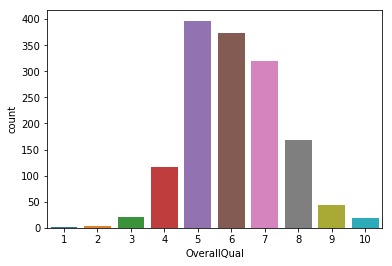

In [114]:
sns.countplot(train_num['OverallQual'])

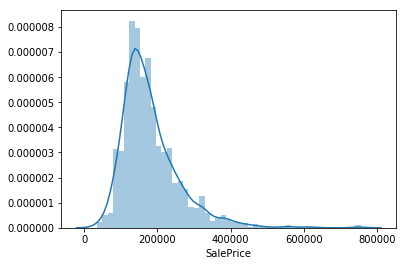

In [49]:
sns.distplot(train_num['SalePrice'])

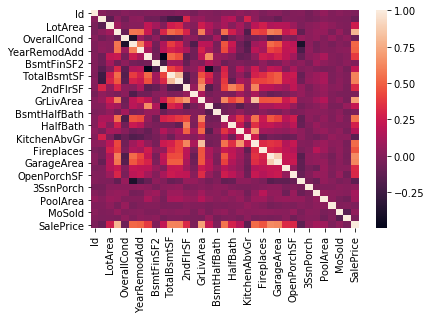

In [50]:
sns.heatmap(train_num.corr())

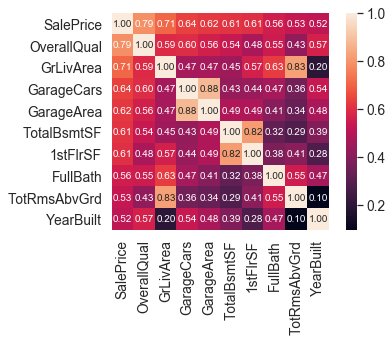

In [249]:
#saleprice correlation matrix
k = 10 #number of variables for heatmap
cols = train_num.corr().nlargest(k, 'SalePrice')['SalePrice'].index
cm = np.corrcoef(train_num[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

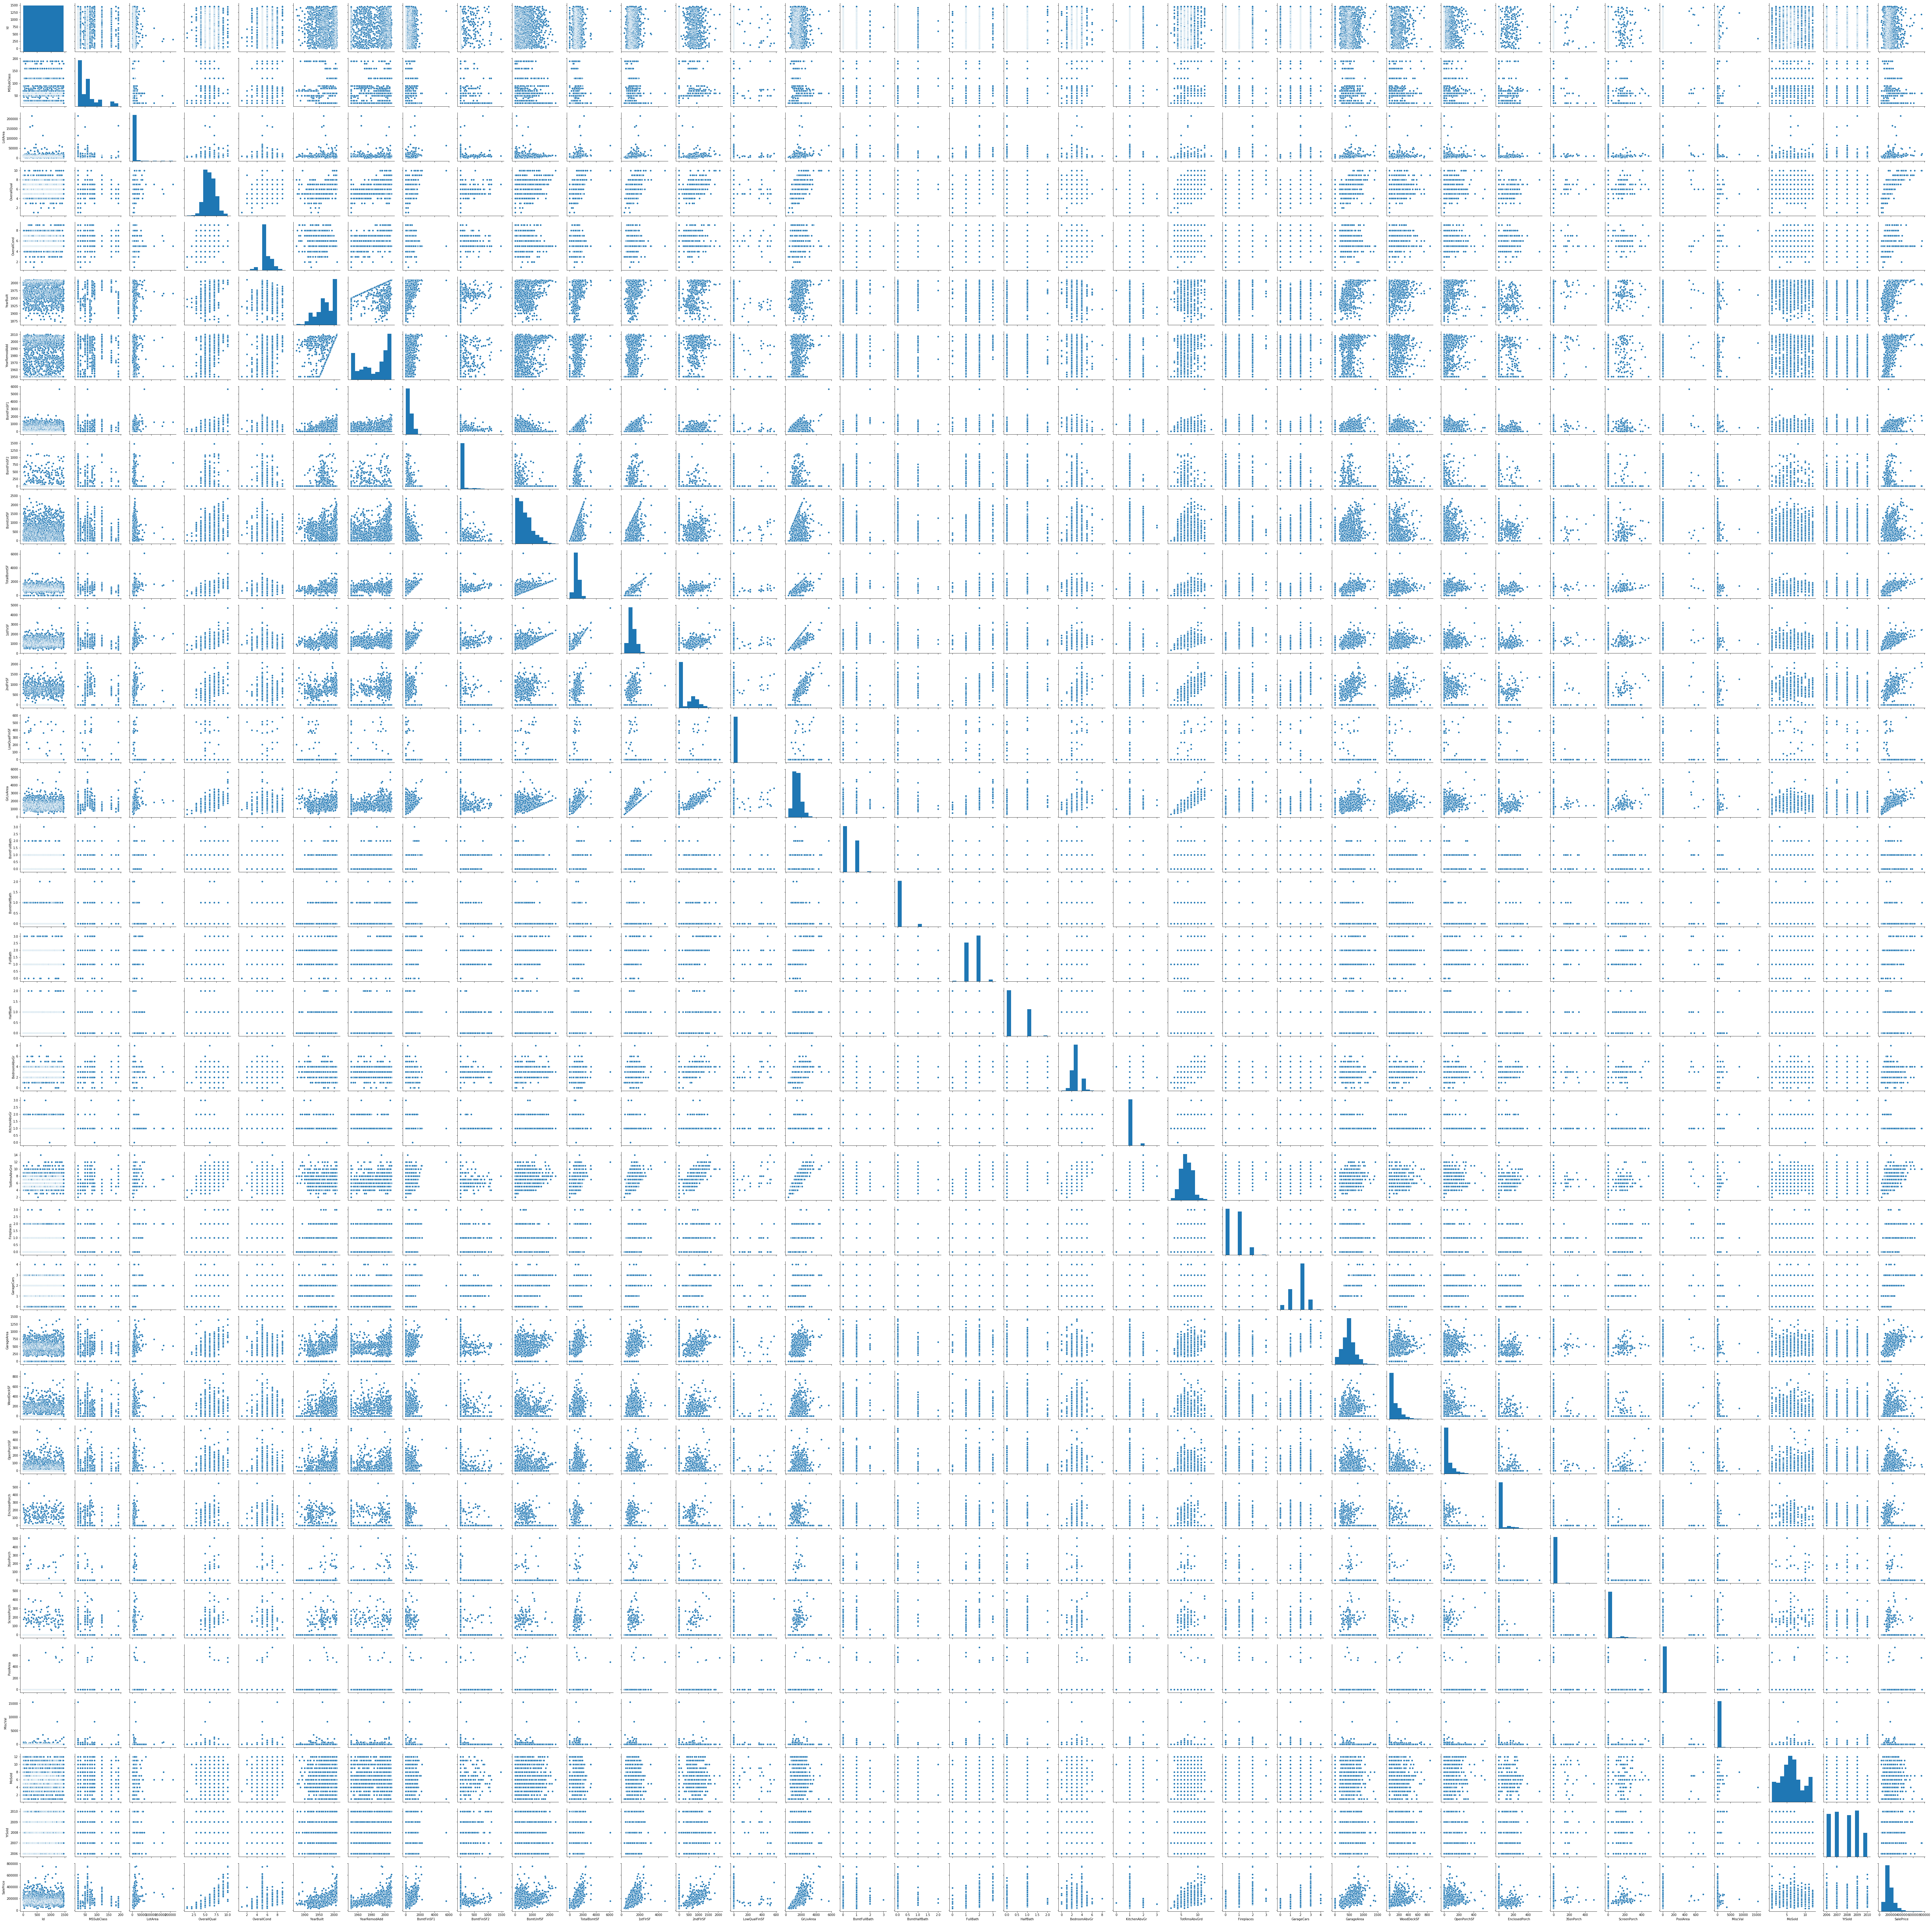

In [37]:
sns.pairplot(train_num)

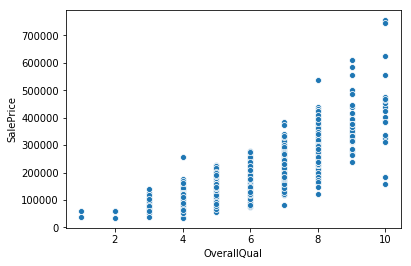

In [51]:
sns.scatterplot(x=train_num['OverallQual'],y=train_num['SalePrice'])

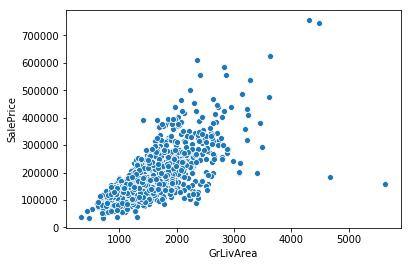

In [52]:
sns.scatterplot(x=train_num['GrLivArea'],y=train_num['SalePrice'])

#Missing Value?- Handled- dropped and substituted
One Hot Encoder for Categorical Variables.

In [157]:
#from sklearn.preprocessing import OneHotEncoder

In [158]:
#enc = OneHotEncoder() # as this results in Sparse Matrix, trying pd.get_dummies.

In [213]:
#Merging Train_cat and test_cat and then encoding so that the number of features remains same in train and test dataset.
Cat_data = pd.concat([train_cat,test_cat])

In [214]:
Cat_data.reset_index(inplace=True)

In [218]:
Cat_data.shape

(2919, 39)

In [219]:
Cat_data_dummies =  pd.get_dummies(Cat_data)

In [236]:
Cat_data_dummies.columns

Index(['index', 'MSZoning_C (all)', 'MSZoning_FV', 'MSZoning_RH',
       'MSZoning_RL', 'MSZoning_RM', 'Street_Grvl', 'Street_Pave',
       'LotShape_IR1', 'LotShape_IR2',
       ...
       'SaleType_ConLw', 'SaleType_New', 'SaleType_Oth', 'SaleType_WD',
       'SaleCondition_Abnorml', 'SaleCondition_AdjLand',
       'SaleCondition_Alloca', 'SaleCondition_Family', 'SaleCondition_Normal',
       'SaleCondition_Partial'],
      dtype='object', length=235)

In [164]:
#train_enc_data = enc.fit(train_cat)

In [165]:
#train_enc_data_trans = train_enc_data.transform(train_cat)

In [119]:
#test_cat_dummies = pd.get_dummies(test_cat)

In [120]:
#test_cat_dummies.shape

(1459, 218)

In [232]:
train_cat_dummies = Cat_data_dummies[:1460]

In [233]:
test_cat_dummies = Cat_data_dummies[1460:]

In [234]:
train_cat_dummies.shape

(1460, 235)

In [235]:
test_cat_dummies.shape

(1459, 235)

In [256]:
train_cat_dummies.set_index('index',inplace=True)

In [258]:
train_cat_dummies.shape

(1460, 234)

In [259]:
test_cat_dummies.set_index('index',inplace=True)

In [260]:
test_cat_dummies.shape

(1459, 234)

In [265]:
train_num.shape,test_num.shape

((1460, 35), (1459, 34))

In [269]:
train = pd.concat([train_num,train_cat_dummies],axis=1)

In [270]:
train.shape

(1460, 269)

In [274]:
test = pd.concat([test_num,test_cat_dummies],axis=1)

In [291]:
test.shape

(1459, 268)

In [172]:
#test_enc_data_trans = train_enc_data.transform(test_cat)

In [174]:
#test_enc_data_trans.shape

(1459, 234)

In [40]:
#from sklearn.model_selection import train_test_split

In [126]:
#X_train_num = train_num.drop('SalePrice',axis=1)

In [293]:
X_train = train.drop(['SalePrice','Id'],axis=1)

In [127]:
#X_train_num = X_train_num.drop('Id',axis=1)

In [296]:
y_train = train['SalePrice']

In [295]:
X_train.shape

(1460, 267)

In [297]:
#X_test_num =  test_num.drop('Id',axis=1)
X_test = test.drop('Id',axis=1)

In [298]:
X_test.shape

(1459, 267)

In [299]:
print("Shape of X_train_num",X_train.shape)
print("Shape of X_test_num",X_test.shape)
print("Shape of y_train",y_train.shape)


Shape of X_train_num (1460, 267)
Shape of X_test_num (1459, 267)
Shape of y_train (1460,)


In [177]:
#X_train_cat = train_enc_data_trans

In [178]:
#X_test_cat = test_enc_data_trans

In [43]:
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [300]:
from sklearn.linear_model import LinearRegression

In [301]:
LR = LinearRegression()

In [303]:
Lin_fit = LR.fit(X_train,y_train)

In [304]:
LR_Predict = Lin_fit.predict(X_test)

In [305]:
LR_Predict = pd.Series(LR_Predict)

In [306]:
LR_Predict.head()

0    114463.458191
1    165583.959778
2    190049.814148
3    199941.813538
4    203106.124817
dtype: float64

In [187]:
#Lin_fit_cat = Lin_Reg.fit(X_train_cat,y_train)

In [188]:
#LR_Predict_cat = Lin_fit_cat.predict(X_test_cat)

In [189]:
#LR_Predict_cat = pd.Series(LR_Predict_cat)

In [190]:
#LR_Predict_cat.head()

0    115046.169505
1    159666.038441
2    178747.263742
3    196960.659820
4    195047.058228
dtype: float64

In [214]:
#LR_Predict = (LR_Predict_num + LR_Predict_cat)/2

In [307]:
from sklearn.ensemble import RandomForestRegressor

In [308]:
RF = RandomForestRegressor()

In [309]:
RF_Fit = RF.fit(X_train,y_train)

/usr/local/lib/python3.6/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [310]:
RF_Predict = RF_Fit.predict(X_test)

In [311]:
RF_Predict = pd.Series(RF_Predict)

In [197]:
#RF_Fit_cat = RF.fit(X_train_cat,y_train)

In [198]:
#RF_Predict_cat = RF_Fit_cat.predict(X_test_cat)

In [199]:
#RF_Predict_cat = pd.Series(RF_Predict_cat)

In [215]:
#RF_Predict = (RF_Predict_num + RF_Predict_cat)/2

In [312]:
from sklearn.ensemble import GradientBoostingRegressor

In [341]:
GBR = GradientBoostingRegressor(n_estimators=3000)

In [342]:
GBR_Fit = GBR.fit(X_train,y_train)

In [343]:
GBR_Predict = GBR_Fit.predict(X_test)

In [344]:
GBR_Predict = pd.Series(GBR_Predict)

In [209]:
#GBR_Fit_cat = GBR.fit(X_train_cat,y_train)

In [210]:
#GBR_Predict_cat = GBR_Fit_cat.predict(X_test_cat)

In [211]:
#GBR_Predict_cat = pd.Series(GBR_Predict_cat)

In [216]:
#GBR_Predict = (GBR_Predict_num + GBR_Predict_cat)/2

In [228]:
#GBR_Predict_1 = (GBR_Predict_num*0.85 + GBR_Predict_cat*0.15)

In [317]:
from xgboost import XGBRegressor

In [347]:
xgb = XGBRegressor(n_estimators=3000)

In [350]:
xgb_fit = xgb.fit(X_train,y_train)

In [351]:
xgb_Predict = xgb_fit.predict(X_test)

In [352]:
xgb_Predict = pd.Series(xgb_Predict)

In [238]:
#xgb_fit_cat = xgb.fit(X_train_cat,y_train)

In [239]:
#xgb_pred_cat = xgb_fit_cat.predict(X_test_cat)

In [240]:
#xgb_pred_cat = pd.Series(xgb_pred_cat)

In [241]:
#XGB_Predict = (xgb_Predict_num + xgb_pred_cat)/2

In [246]:
#XGB_Predict_1 = xgb_Predict_num*0.9 + xgb_pred_cat*0.1

In [355]:
Mix_Predict = (GBR_Predict*0.9 + xgb_Predict*0.1)

In [358]:
from sklearn.linear_model import LassoCV

In [359]:
LCV = LassoCV(alphas=[0.1,0.01,0.001,1,10,100,1000,0.0005,0.0001, 0.0003, 0.0006,0.003, 0.006, 0.03, 0.06,
                      0.3, 0.6,],max_iter=50000,cv=10)

In [360]:
LCV_FIT = LCV.fit(X_train,y_train)

In [361]:
LCV_PREDICT = LCV_FIT.predict(X_test)

In [362]:
LCV_PREDICT = pd.Series(LCV_PREDICT)

In [322]:
test['Id'].head()

0    1461
1    1462
2    1463
3    1464
4    1465
Name: Id, dtype: int64

In [323]:
LR_Model = pd.concat([test['Id'],LR_Predict],axis=1)

In [324]:
LR_Model.columns = ['Id','SalePrice']

In [325]:
LR_Model.head()

Id      SalePrice
0  1461  114463.458191
1  1462  165583.959778
2  1463  190049.814148
3  1464  199941.813538
4  1465  203106.124817

In [326]:
LR_Model.to_csv('/Users/ankitgupta/Sonam/Kaggle-Competitions/Housing_Predictions/LR_AllData.csv',index=False)

In [327]:
RF_Model = pd.concat([test['Id'],RF_Predict],axis=1)
RF_Model.columns = ['Id','SalePrice']

In [328]:
RF_Model.to_csv('/Users/ankitgupta/Sonam/Kaggle-Competitions/Housing_Predictions/RF_AllData.csv',index=False)

In [345]:
GBR_Model = pd.concat([test['Id'],GBR_Predict],axis=1)
GBR_Model.columns = ['Id','SalePrice']

In [346]:
GBR_Model.to_csv('/Users/ankitgupta/Sonam/Kaggle-Competitions/Housing_Predictions/GBR_Estimator3000.csv',index=False)

In [353]:
XGB_Model = pd.concat([test['Id'],xgb_Predict],axis=1)
XGB_Model.columns = ['Id','SalePrice']

In [354]:
XGB_Model.to_csv('/Users/ankitgupta/Sonam/Kaggle-Competitions/Housing_Predictions/XGB_estimator3000.csv',index=False)

In [356]:
Mix_Model = pd.concat([test['Id'],Mix_Predict],axis=1)
Mix_Model.columns = ['Id','SalePrice']

In [357]:
Mix_Model.to_csv('/Users/ankitgupta/Sonam/Kaggle-Competitions/Housing_Predictions/GBR_XGB_9010.csv',index=False)

In [363]:
LCV_Model = pd.concat([test['Id'],LCV_PREDICT],axis=1)
LCV_Model.columns = ['Id','SalePrice']

In [364]:
LCV_Model.to_csv('/Users/ankitgupta/Sonam/Kaggle-Competitions/Housing_Predictions/LCV.csv',index=False)

In [226]:
LR_Predict_File = pd.read_csv('/Users/ankitgupta/Sonam/Kaggle-Competitions/Housing_Predictions/LR_NumCatMean.csv')

In [227]:
LR_Predict_File.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 2 columns):
Id           1459 non-null int64
SalePrice    1459 non-null float64
dtypes: float64(1), int64(1)
memory usage: 22.9 KB
